In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# read file 
df = pd.read_csv("rawData2.csv")

In [3]:
# check head
df.head()

,Date,Time,Temperature,Humidity,Luminosity
0,2021-11-4,18:00:00,21.5,34.1,very bright
1,2021-11-4,18:00:00,21.5,17.5,very bright
2,2021-11-4,18:00:00,21.5,35.6,very bright
3,2021-11-4,18:00:00,21.6,35.2,very bright
4,2021-11-4,18:00:00,21.6,34.6,very bright


In [4]:
'''
#Rename first column
df = df.rename(columns={'2021-10-4': 'Date', '18:00:00': 'Time', '21.50': 'Temperature', '33.00' : 'Humidity', 'bright' : 'Luminosity'})
'''

"\n#Rename first column\ndf = df.rename(columns={'2021-10-4': 'Date', '18:00:00': 'Time', '21.50': 'Temperature', '33.00' : 'Humidity', 'bright' : 'Luminosity'})\n"

In [5]:
# check head
df.head()

,Date,Time,Temperature,Humidity,Luminosity
0,2021-11-4,18:00:00,21.5,34.1,very bright
1,2021-11-4,18:00:00,21.5,17.5,very bright
2,2021-11-4,18:00:00,21.5,35.6,very bright
3,2021-11-4,18:00:00,21.6,35.2,very bright
4,2021-11-4,18:00:00,21.6,34.6,very bright


In [6]:
'''
#Correcting wrong date
for i in range(len(df['Date'])):
    df['Date'][i] = df['Date'][i].replace('-10-', '-11-')
'''

"\n#Correcting wrong date\nfor i in range(len(df['Date'])):\n    df['Date'][i] = df['Date'][i].replace('-10-', '-11-')\n"

In [7]:
df.head()

,Date,Time,Temperature,Humidity,Luminosity
0,2021-11-4,18:00:00,21.5,34.1,very bright
1,2021-11-4,18:00:00,21.5,17.5,very bright
2,2021-11-4,18:00:00,21.5,35.6,very bright
3,2021-11-4,18:00:00,21.6,35.2,very bright
4,2021-11-4,18:00:00,21.6,34.6,very bright


In [9]:
df.dropna()

,Date,Time,Temperature,Humidity,Luminosity
0,2021-11-4,18:00:00,21.5,34.1,very bright
1,2021-11-4,18:00:00,21.5,17.5,very bright
2,2021-11-4,18:00:00,21.5,35.6,very bright
3,2021-11-4,18:00:00,21.6,35.2,very bright
4,2021-11-4,18:00:00,21.6,34.6,very bright
...,...,...,...,...,...
8841,2021-11-17,10:00:00,21.0,34.9,very bright
8842,2021-11-17,10:00:00,21.0,34.7,very bright
8843,2021-11-17,10:00:00,21.0,34.6,very bright
8844,2021-11-17,10:00:00,21.0,34.4,very bright


In [10]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Luminosity,3,0.000339
Date,0,0.000000
Time,0,0.000000
Temperature,0,0.000000
Humidity,0,0.000000


In [11]:
#Add date string and time string togheter
df['Date'] + ' ' + df['Time']

0        2021-11-4 18:00:00
1        2021-11-4 18:00:00
2        2021-11-4 18:00:00
3        2021-11-4 18:00:00
4        2021-11-4 18:00:00
               ...         
8841    2021-11-17 10:00:00
8842    2021-11-17 10:00:00
8843    2021-11-17 10:00:00
8844    2021-11-17 10:00:00
8845    2021-11-17 10:00:00
Length: 8846, dtype: object

In [12]:
#Make date and time into one column with datetime as dtype
DateTime = pd.to_datetime(df['Date'] + ' ' + df['Time'])
DateTime

0      2021-11-04 18:00:00
1      2021-11-04 18:00:00
2      2021-11-04 18:00:00
3      2021-11-04 18:00:00
4      2021-11-04 18:00:00
               ...        
8841   2021-11-17 10:00:00
8842   2021-11-17 10:00:00
8843   2021-11-17 10:00:00
8844   2021-11-17 10:00:00
8845   2021-11-17 10:00:00
Length: 8846, dtype: datetime64[ns]

In [13]:
df.dtypes

Date            object
Time            object
Temperature    float64
Humidity       float64
Luminosity      object
dtype: object

In [14]:
#drop old coulumns
df = df.drop(['Date', 'Time'], axis=1)
df

,Temperature,Humidity,Luminosity
0,21.5,34.1,very bright
1,21.5,17.5,very bright
2,21.5,35.6,very bright
3,21.6,35.2,very bright
4,21.6,34.6,very bright
...,...,...,...
8841,21.0,34.9,very bright
8842,21.0,34.7,very bright
8843,21.0,34.6,very bright
8844,21.0,34.4,very bright


In [15]:
#Insert DateTime as new coulumn
df.insert(0, "DateTime", DateTime)

In [16]:
df.dtypes

DateTime       datetime64[ns]
Temperature           float64
Humidity              float64
Luminosity             object
dtype: object

In [17]:
df

,DateTime,Temperature,Humidity,Luminosity
0,2021-11-04 18:00:00,21.5,34.1,very bright
1,2021-11-04 18:00:00,21.5,17.5,very bright
2,2021-11-04 18:00:00,21.5,35.6,very bright
3,2021-11-04 18:00:00,21.6,35.2,very bright
4,2021-11-04 18:00:00,21.6,34.6,very bright
...,...,...,...,...
8841,2021-11-17 10:00:00,21.0,34.9,very bright
8842,2021-11-17 10:00:00,21.0,34.7,very bright
8843,2021-11-17 10:00:00,21.0,34.6,very bright
8844,2021-11-17 10:00:00,21.0,34.4,very bright


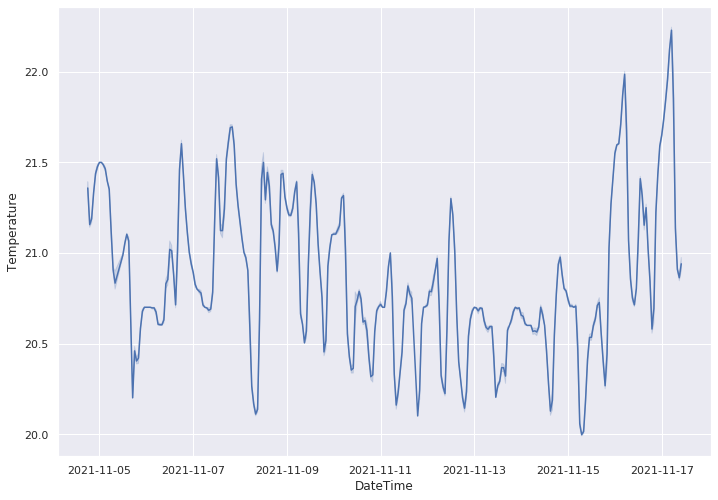

In [18]:
#plot temperature
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=df, x='DateTime', y="Temperature")

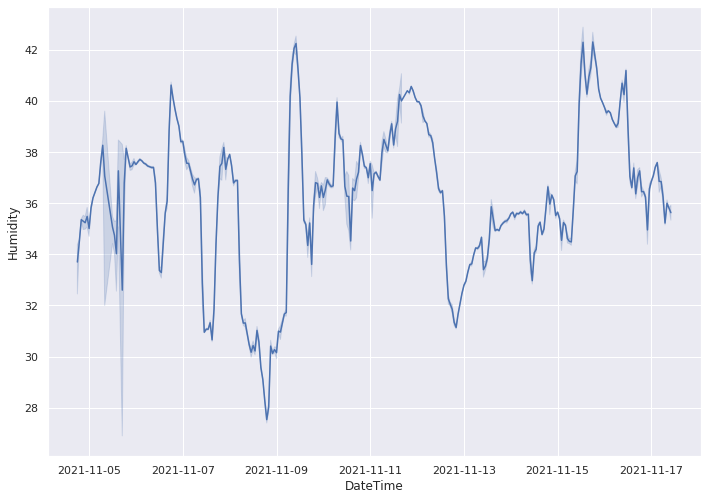

In [19]:
#plot humitity
sns.lineplot(data=df, x='DateTime', y="Humidity")

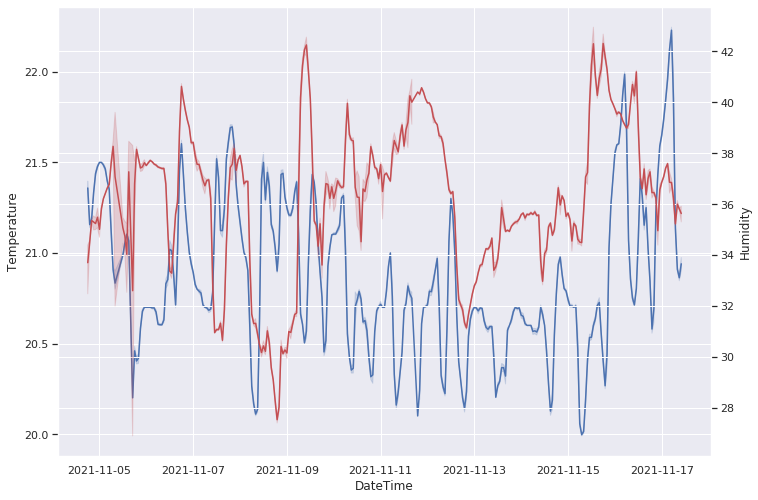

In [20]:
#Show temperature overlapping humidity
fig, ax = plt.subplots()
sns.lineplot(x='DateTime', y='Temperature', data=df, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='DateTime', y='Humidity', data=df, ax=ax2, color='r')
plt.show()